## Building Machine Learning Model for Wisconsin Breast Cancer Data(WBCD)


- The purpose of this model is to predict wheather the patient has benign or malignat cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [2]:
## Display all the columns of the dataframe
#pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('wbcd.csv')



In [3]:
#checking first 5 records
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
# number of rows and columns in dataset
df.shape

(569, 32)

In [5]:
#poping out the ID column
df_id = pd.DataFrame(df.pop('id'))

In [6]:
df.shape
#df_id

(569, 31)

In [7]:
#Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Cleaning & Feature Engineering
1. Missing Values
2. Numerical & Catagorical Variables
3. Distribution of the Numerical Variables
4. Distribution of Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(diagnosis)

In [9]:
# ## Here we will check the percentage of missing values present in each feature
#df.isnull().sum()
df_missing_perc = pd.DataFrame({'Columns':df.isnull().sum().index,'No of null values Missing':df.isna().sum().values,'Percentage':df.isna().sum().values/df.shape[0]})
df_missing_perc


,Columns,No of null values Missing,Percentage
0,diagnosis,0,0.0
1,radius_mean,0,0.0
2,texture_mean,0,0.0
3,perimeter_mean,0,0.0
4,area_mean,0,0.0
5,smoothness_mean,0,0.0
6,compactness_mean,0,0.0
7,concavity_mean,0,0.0
8,points_mean,0,0.0
9,symmetry_mean,0,0.0


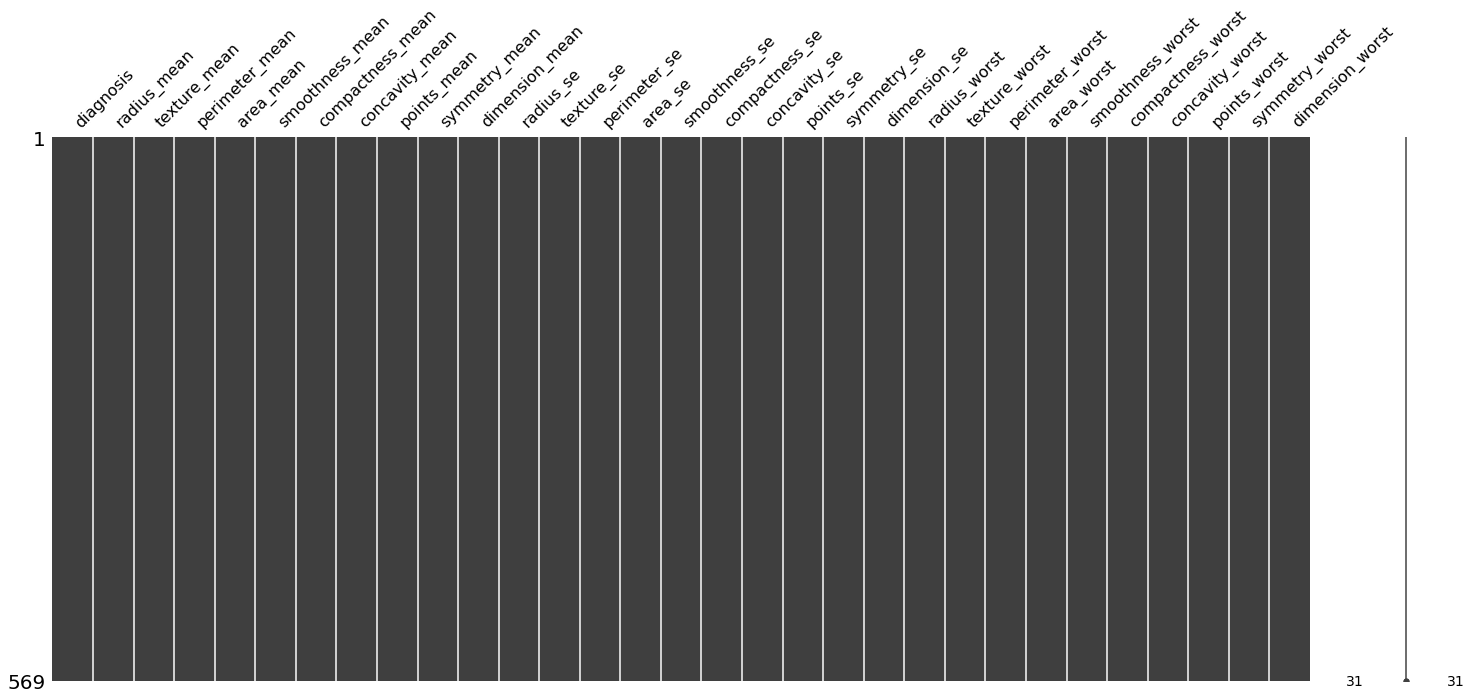

In [10]:
# or we can use  msno library 
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(df)
plt.show()

###  There is no missing value otherwise it would give us the propotion of missing values

In [11]:
# Lets Check data is balance or imbalance by checking the values present in 'diagnosis' column
round(df['diagnosis'].value_counts()/len(df['diagnosis']),2)

B    0.63
M    0.37
Name: diagnosis, dtype: float64

 ### Seprating Numerical Features


In [12]:
df_num = df.select_dtypes('number')
print('Number of numerical variables: ', len(df_num.columns))

Number of numerical variables:  30


In [13]:
df_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# EDA_Numerical_variables

In [14]:
df_num.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
# We only choosing few variables to check how our model will work
df_cor = df_num[['radius_mean','texture_mean','perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','points_mean',
                 'symmetry_mean','dimension_mean','radius_worst']]

df_cor.corr()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_worst
radius_mean,1.000000,0.323782,0.997855,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.969539
texture_mean,0.323782,1.000000,0.329533,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.352573
perimeter_mean,0.997855,0.329533,1.000000,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.969476
smoothness_mean,0.170581,-0.023389,0.207278,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.213120
compactness_mean,0.506124,0.236702,0.556936,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.535315
concavity_mean,0.676764,0.302418,0.716136,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.688236
points_mean,0.822529,0.293464,0.850977,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.830318
symmetry_mean,0.147741,0.071401,0.183027,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.185728
dimension_mean,-0.311631,-0.076437,-0.261477,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.253691
radius_worst,0.969539,0.352573,0.969476,0.213120,0.535315,0.688236,0.830318,0.185728,-0.253691,1.000000


In [16]:
# Lets check the correlation between selected variables
#df_cor.corr()

In [17]:
# Lets visulize the relationship
#sns.pairplot(df)

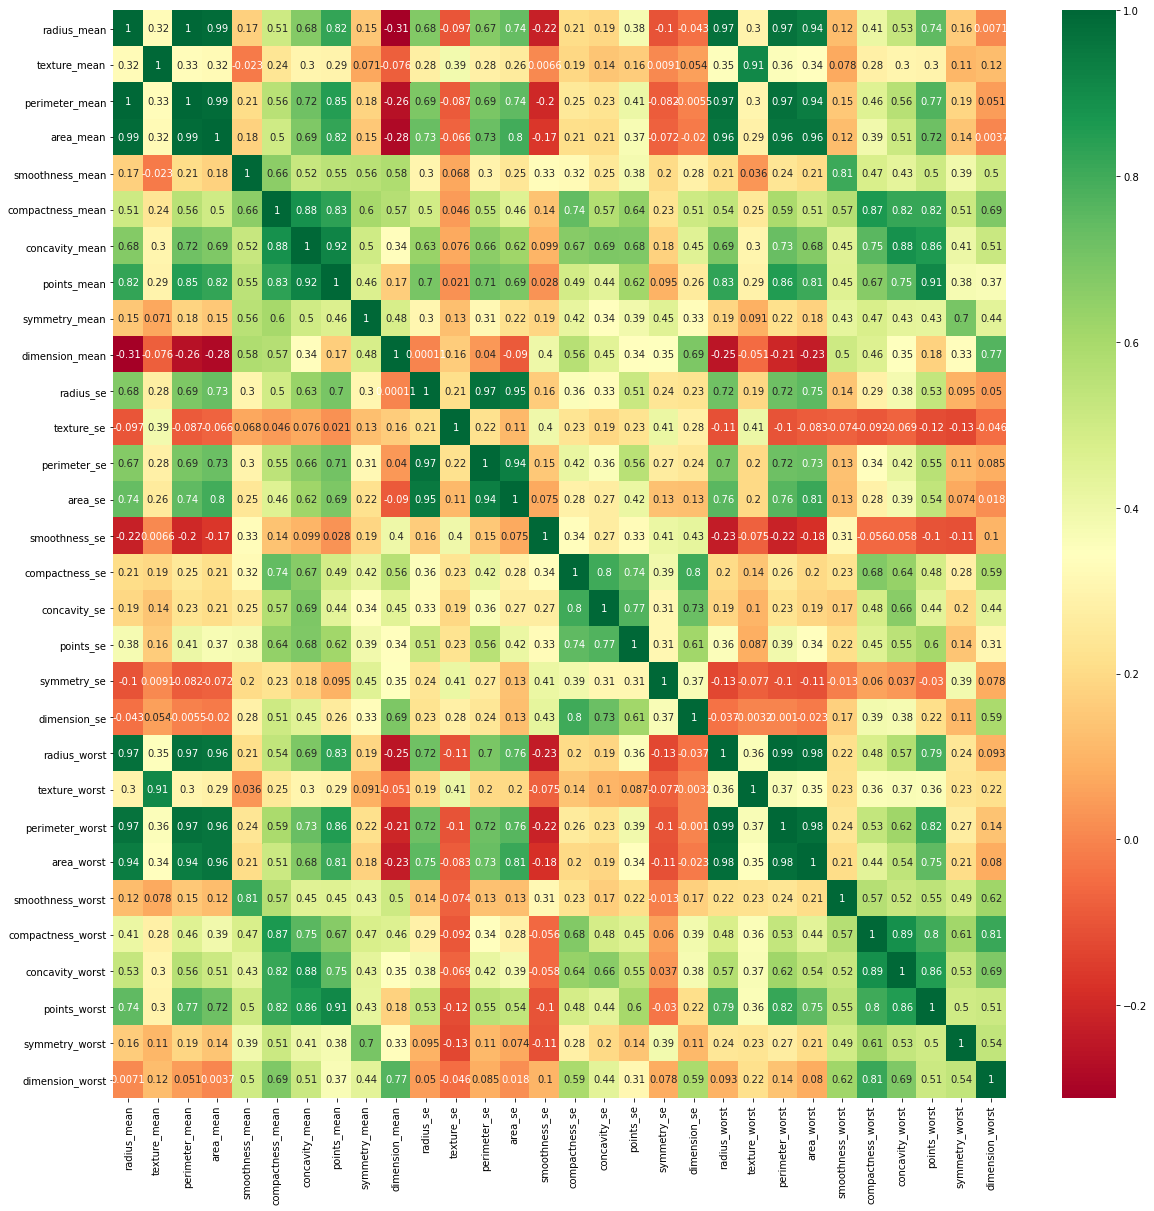

In [18]:
# Checking correlation with heatmap

import seaborn as sns
#get correlations of each features in dataset
corrmat = df_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Seprating catagorical variables

In [19]:
df_cat = df.select_dtypes('object')
print('Number of numerical variables: ', len(df_cat.columns))

Number of numerical variables:  1


In [20]:
df_cat.head()

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [21]:
df_cat=df_cat.replace({'B':0,'M':1})

In [22]:
df_cat['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# EDA ANALYSIS USING PANDAS PROFILING

In [23]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [24]:
pfr = pandas_profiling.ProfileReport(df_num)

C:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
#pfr

In [26]:
# With pandas profiling we have quickly notice that most of the variables has skewed distribution and many variables are higly correlated
# so with the business knowledge we can choose the variable according to their impact on model

In [27]:
#pfr.to_notebook_iframe()

In [28]:
#pfr.to_file(output_file="wbcd.html")

# Merging df_num and df_cat for model data

In [29]:
model = pd.merge(df_num , df_cat , left_index=True, right_index=True)

In [30]:
model.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,0
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,0
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,0
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,0


# Spliting data for Training and Testing

In [31]:
model.columns.tolist()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst',
 'diagnosis']

In [32]:
 #from sklearn.preprocessing import scale
X = model.loc[:,['radius_mean',
  'texture_mean',
 #'perimeter_mean',
  'area_mean',
 #'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 #'symmetry_mean',
 #'dimension_mean',
 #'radius_se',
#  'texture_se',
#  'perimeter_se',
 'area_se',
#  'smoothness_se',
#  'compactness_se',
#  'concavity_se',
#  'points_se',
#  'symmetry_se',
#  'dimension_se',
 'radius_worst',
#  'texture_worst',
#  'perimeter_worst',
 'area_worst',
#  'smoothness_worst',
#  'compactness_worst',
  'concavity_worst',
  'points_worst',
  'symmetry_worst',
  'dimension_worst',
#  'concavity_se_boxcox',
                ]]
 #'diagnosis']]
                 

In [33]:
y = model.loc[:,'diagnosis']

In [34]:
X.shape

(569, 13)

In [35]:
y.shape

(569,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , stratify = y)

In [37]:
# X_test
#y_test

# Feature Importance

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
f_imp = ExtraTreesClassifier()
f_imp.fit(X,y)

ExtraTreesClassifier()

In [39]:
print(f_imp.feature_importances_)

[0.09205881 0.03358364 0.06645399 0.03435721 0.10140947 0.09966579
 0.04247888 0.13042459 0.11998703 0.07189517 0.16390944 0.0235449
 0.02023107]


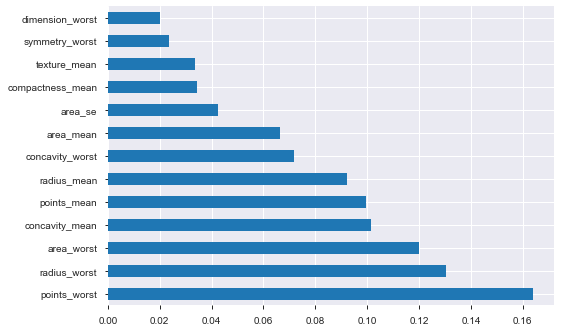

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(f_imp.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# USING KNN MODEL

In [183]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 15, metric='euclidean')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

## Checking Cross Validation Score

In [184]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_knn,X_train , y_train , cv = 5)

In [185]:
cv_score

array([0.9125    , 0.9625    , 0.95      , 0.89873418, 0.96202532])

In [186]:
cv_score.mean()

0.9371518987341773

In [187]:
y_predict = model_knn.predict(X_test)
#np.mean(y_predict == y_train)
#y_predict # PV


In [188]:
y_test # AV
np.mean(y_predict == y_test)

0.9239766081871345

In [189]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test,y_predict)
#confusion_matrix(AV,PV)
#100/114

array([[103,   4],
       [  9,  55]], dtype=int64)

In [190]:
np.mean(y_test == y_predict)

0.9239766081871345

In [191]:
 accuracy_score(y_test,y_predict)

0.9239766081871345

# Using Decision Tree Model

In [192]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=4, random_state=42 , criterion='entropy')

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## Checking Cross Validation Score

In [193]:
from sklearn.model_selection import cross_val_score
cv_score_dt = cross_val_score(dt,X_train , y_train , cv = 5)


In [194]:
cv_score_dt

array([0.925     , 0.925     , 0.95      , 0.93670886, 0.92405063])

In [195]:
cv_score_dt.mean()

0.9321518987341773

In [196]:
# Predict test set labels
y_pred_dt = dt.predict(X_test)
#print(y_pred)


In [197]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_test , y_pred_dt)

0.9649122807017544

In [198]:
confusion_matrix(y_test , y_pred_dt)

array([[105,   2],
       [  4,  60]], dtype=int64)

# Using Random Forest

In [229]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Instantiate rf
rf = RandomForestClassifier(n_estimators=15,random_state=42)

# Fit rf to the training set    
rf.fit(X_train, y_train) 


RandomForestClassifier(n_estimators=15, random_state=42)

In [230]:
from sklearn.model_selection import cross_val_score
rf_cv =cross_val_score(rf,X_train,y_train,cv=5)

In [231]:
rf_cv.mean()

0.9523101265822784

In [232]:
# Predict the test set labels
y_pred_rf = rf.predict(X_test)

In [233]:
# Predict_probablilties the test set labels
y_pred_prob = rf.predict_proba(X_test)
#print(y_pred_prob)

In [234]:
accuracy_score(y_test , y_pred_rf)

0.9473684210526315

In [235]:
confusion_matrix(y_test , y_pred_rf)

array([[102,   5],
       [  4,  60]], dtype=int64)

# With XGBoost

In [236]:
## Hyperparameter optimization using RandomizedSearchCV
from xgboost import XGBClassifier

In [237]:
xg_model=xgboost.XGBClassifier(n_estimators=50,learning_rate=0.1,random_state = 42)
xg_model.fit(X_train,y_train )


XGBClassifier(n_estimators=50, random_state=42)

## Checking Cross Validation Score

In [238]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xg_model,X,y,cv=10)

In [239]:
score

array([0.96491228, 0.92982456, 0.94736842, 0.94736842, 0.98245614,
       0.94736842, 0.96491228, 0.96491228, 1.        , 0.98214286])

In [240]:
score.mean()

0.9631265664160402

In [241]:
# Fit dt to the training set
xg_model.fit(X_train, y_train)
# Predict test set labels
y_pred_xg = xg_model.predict(X_test)
#print(y_pred)


In [242]:
y_pred_xg_prob = xg_model.predict_proba(X_test)


In [243]:
accuracy_score(y_test , y_pred_xg)

0.9824561403508771

In [244]:
confusion_matrix(y_test , y_pred_xg)

array([[105,   2],
       [  1,  63]], dtype=int64)

# FEATURE importance

In [247]:
confusion_matrix(y_test , y_pred_xg)


array([[105,   2],
       [  1,  63]], dtype=int64)

In [248]:
from sklearn.metrics import classification_report
print(classification_report (y_test , y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.97      0.98      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# in this use case we chose features with our best knowlodge however it can be much better selection if we ask accurate questions to sme's.
- I choose model based on FN ( False Negative Rate) 
- XG Boost shows in higher accuracy with all evaluation metrics

In [257]:
import pickle
file = open('xg_boost_model_final.pkl','wb')
pickle.dump(xg_model,file)